In [ ]:
import re
import csv
from os import listdir
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import spacy
spacy_nlp = spacy.load('en')

# Cacm Data

In [ ]:
url = 'https://raw.githubusercontent.com/AkshithBellare/cluster-based-information-retrieval/master/data.csv'
df = pd.read_csv(url)
df.dropna()

,Doc Name,Doc Contents
0,CACM-0001.txt,preliminary report-international algebraic lan...
1,CACM-0002.txt,extraction of roots by repeated subtractions f...
2,CACM-0003.txt,techniques department on matrix program scheme...
3,CACM-0004.txt,glossary of computer engineering and programmi...
4,CACM-0005.txt,two square-root approximations cacm november 1...
...,...,...
3199,CACM-3200.txt,a formac program for the solution of linear bo...
3200,CACM-3201.txt,symbolic manipulation of poisson series poisso...
3201,CACM-3202.txt,manip a computer system for algebra and analyt...
3202,CACM-3203.txt,grad assistant a program for symbolic algebra...


In [ ]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
punct = set(string.punctuation)
nltk.download('stopwords')
nltk.download('wordnet')
sws = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def normalize(doc):
    # processed_list = []
    stop_free = " ".join([i for i in doc.lower().split() if i not in sws])
    punc_free = ''.join(ch for ch in stop_free if ch not in punct)
    # print(punc_free)
    return punc_free
    
def lemmatizer(doc):
    normalized_lemmatized = " ".join(lemma.lemmatize(word) for word in doc.split())
    processed_lemmatized = re.sub(r"\d+", "", normalized_lemmatized)
    y = processed_lemmatized
    return y

def stemmer(doc):
    normalized_stemmed = " ".join(ps.stem(word) for word in doc.split())
    processed_stemmed = re.sub(r"\d+", "", normalized_stemmed)
    y = processed_stemmed
    return y

def ner(doc):
    document = spacy_nlp(doc)
    return [e.value for e in document.ents]

def clean(df):
    df['stop_free'] = df['Doc Contents'].apply(normalize)
    df['stemm'] = df['stop_free'].apply(stemmer)
    df['lemm'] = df['stop_free'].apply(lemmatizer)

In [ ]:
clean(df)
df.head()

,Doc Name,Doc Contents,stop_free,stemm,lemm
0,CACM-0001.txt,preliminary report-international algebraic lan...,preliminary reportinternational algebraic lang...,preliminari reportintern algebra languag cacm ...,preliminary reportinternational algebraic lang...
1,CACM-0002.txt,extraction of roots by repeated subtractions f...,extraction roots repeated subtractions digital...,extract root repeat subtract digit comput cacm...,extraction root repeated subtraction digital c...
2,CACM-0003.txt,techniques department on matrix program scheme...,techniques department matrix program schemes c...,techniqu depart matrix program scheme cacm dec...,technique department matrix program scheme cac...
3,CACM-0004.txt,glossary of computer engineering and programmi...,glossary computer engineering programming term...,glossari comput engin program terminolog cacm ...,glossary computer engineering programming term...
4,CACM-0005.txt,two square-root approximations cacm november 1...,two squareroot approximations cacm november 19...,two squareroot approxim cacm novemb wadey w g...,two squareroot approximation cacm november wa...


# Trec data

In [ ]:
!wget https://trec.nist.gov/data/filtering/t9.ohsu-trec.tar.gz

--2021-11-24 04:31:07--  https://trec.nist.gov/data/filtering/t9.ohsu-trec.tar.gz
Resolving trec.nist.gov (trec.nist.gov)... 129.6.13.19, 2610:20:6005:13::19
Connecting to trec.nist.gov (trec.nist.gov)|129.6.13.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26175053 (25M) [application/x-gzip]
Saving to: ‘t9.ohsu-trec.tar.gz’

t9.ohsu-trec.tar.gz 100%[===================>]  24.96M  9.24MB/s    in 2.7s    

2021-11-24 04:31:11 (9.24 MB/s) - ‘t9.ohsu-trec.tar.gz’ saved [26175053/26175053]



In [ ]:
!tar -xvf /content/t9.ohsu-trec.tar.gz

ohsu-trec/
ohsu-trec/README
ohsu-trec/sample.map
ohsu-trec/trec9-test/
ohsu-trec/trec9-test/qrels.mesh.88-91
ohsu-trec/trec9-test/qrels.ohsu.88-91
ohsu-trec/trec9-train/
ohsu-trec/trec9-train/ohsumed.87
ohsu-trec/trec9-train/qrels.mesh.adapt.87
ohsu-trec/trec9-train/qrels.mesh.batch.87
ohsu-trec/trec9-train/qrels.ohsu.adapt.87
ohsu-trec/trec9-train/qrels.ohsu.batch.87
ohsu-trec/trec9-train/query.mesh.1-4904
ohsu-trec/trec9-train/query.ohsu.1-63
ohsu-trec/pre-test/
ohsu-trec/pre-test/qrels.mesh.test.87
ohsu-trec/pre-test/qrels.ohsu.test.87
ohsu-trec/pre-test/query.mesh.test.1-119
ohsu-trec/pre-test/query.ohsu.test.1-43
ohsu-trec/pre-test/ohsumed.87
ohsu-trec/mesh-sample.prl


In [ ]:
file = open('/content/ohsu-trec/trec9-train/ohsumed.87','r')
lines = file.readlines()
n = len(lines)
i = 0
data = []
curr = {}
cols = ['U', 'S', 'M', 'T', 'P', 'W', 'A']
while i < n:
    if lines[i].startswith('.I'):
        if i > 0:
            data.append(curr)
        curr = {}
    for c in cols:
        if lines[i].startswith(f'.{c}'):
            curr[c] = lines[i+1][:-1]
            i += 1
            break
    i += 1
trec_df = pd.DataFrame(data)
trec_df.rename(columns={'W': 'Doc Contents'}, inplace = True)
trec_df['Doc Contents'] = trec_df['Doc Contents'].astype(str)
print(trec_df.shape)
trec_df.head()

(54709, 7)


,U,S,M,T,P,Doc Contents,A
0,87049087,Am J Emerg Med 8703; 4(6):491-5,Allied Health Personnel/*; Electric Countersho...,Refibrillation managed by EMT-Ds: incidence an...,JOURNAL ARTICLE.,Some patients converted from ventricular fibri...,Stults KR; Brown DD.
1,87049088,Am J Emerg Med 8703; 4(6):496-500,"Antidepressive Agents, Tricyclic/*PO; Arrhythm...",Tricyclic antidepressant overdose: emergency d...,JOURNAL ARTICLE.,There is controversy regarding the appropriate...,Foulke GE; Albertson TE; Walby WF.
2,87049089,Am J Emerg Med 8703; 4(6):501-3,Adult; Aircraft/*; Altitude/*; Blood Gas Monit...,Transconjunctival oxygen monitoring as a predi...,JOURNAL ARTICLE.,As the use of helicopters for air transport of...,Shufflebarger C; Jehle D; Cottington E; Martin M.
3,87049090,Am J Emerg Med 8703; 4(6):504-6,Adolescence; Adult; Aged; Blood Glucose/*ME; D...,Serum glucose changes after administration of ...,JOURNAL ARTICLE.,A prospective clinical trial was conducted to ...,Adler PM.
4,87049092,Am J Emerg Med 8703; 4(6):511-3,"Aged; Aged, 80 and over; Case Report; Female; ...",Nasogastric intubation: morbidity in an asympt...,JOURNAL ARTICLE.,An unusual case of a misdirected nasogastric t...,Gough D; Rust D.


In [ ]:
clean(trec_df)
trec_df.head()

,U,S,M,T,P,Doc Contents,A,stop_free,stemm,lemm
0,87049087,Am J Emerg Med 8703; 4(6):491-5,Allied Health Personnel/*; Electric Countersho...,Refibrillation managed by EMT-Ds: incidence an...,JOURNAL ARTICLE.,Some patients converted from ventricular fibri...,Stults KR; Brown DD.,patients converted ventricular fibrillation or...,patient convert ventricular fibril organ rhyth...,patient converted ventricular fibrillation org...
1,87049088,Am J Emerg Med 8703; 4(6):496-500,"Antidepressive Agents, Tricyclic/*PO; Arrhythm...",Tricyclic antidepressant overdose: emergency d...,JOURNAL ARTICLE.,There is controversy regarding the appropriate...,Foulke GE; Albertson TE; Walby WF.,controversy regarding appropriate utilization ...,controversi regard appropri util health care r...,controversy regarding appropriate utilization ...
2,87049089,Am J Emerg Med 8703; 4(6):501-3,Adult; Aircraft/*; Altitude/*; Blood Gas Monit...,Transconjunctival oxygen monitoring as a predi...,JOURNAL ARTICLE.,As the use of helicopters for air transport of...,Shufflebarger C; Jehle D; Cottington E; Martin M.,use helicopters air transport critically ill p...,use helicopt air transport critic ill patient ...,use helicopter air transport critically ill pa...
3,87049090,Am J Emerg Med 8703; 4(6):504-6,Adolescence; Adult; Aged; Blood Glucose/*ME; D...,Serum glucose changes after administration of ...,JOURNAL ARTICLE.,A prospective clinical trial was conducted to ...,Adler PM.,prospective clinical trial conducted estimate ...,prospect clinic trial conduct estim rise serum...,prospective clinical trial conducted estimate ...
4,87049092,Am J Emerg Med 8703; 4(6):511-3,"Aged; Aged, 80 and over; Case Report; Female; ...",Nasogastric intubation: morbidity in an asympt...,JOURNAL ARTICLE.,An unusual case of a misdirected nasogastric t...,Gough D; Rust D.,unusual case misdirected nasogastric tube desc...,unusu case misdirect nasogastr tube describ el...,unusual case misdirected nasogastric tube desc...


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lemm'])

In [ ]:
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


11306

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape) 
type(tfidf)

(3204, 11306)


scipy.sparse.csr.csr_matrix

# Hard clustering

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering

num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
print(km.labels_)
clusters = km.labels_.tolist()

[7 2 0 ... 1 3 3]


In [ ]:
df['cluster'] = clusters
df['cluster'].value_counts()

8    864
5    718
2    625
9    273
1    226
4    123
6    118
3    114
0     78
7     65
Name: cluster, dtype: int64

In [ ]:
result = {}

for i in range(len(clusters)):
    if clusters[i] in result:
        result[clusters[i]].append(i)
    else:
        temp = [i]
        result[clusters[i]] = temp
print(result)

{5: [0, 1, 3, 4, 5, 9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 30, 34, 35, 36, 37, 40, 42, 43, 44, 46, 59, 61, 63, 64, 66, 71, 72, 73, 74, 75, 76, 78, 79, 80, 82, 84, 86, 90, 99, 100, 101, 104, 106, 107, 108, 109, 112, 114, 116, 117, 118, 120, 121, 124, 125, 126, 127, 128, 131, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 175, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 200, 202, 203, 205, 206, 208, 211, 212, 213, 214, 215, 216, 217, 218, 220, 222, 224, 226, 227, 228, 231, 232, 234, 236, 237, 239, 243, 244, 245, 246, 252, 254, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 285, 286, 287, 288, 289, 290, 292, 293, 295, 296, 298, 301, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 315, 316, 317, 322, 325, 326, 332, 333, 337, 338, 339, 340, 342, 344, 345, 347, 352, 354, 355, 357, 358, 359, 360, 362, 363, 368, 369, 370, 371, 3

In [ ]:
num_clusters = 10
ag = AgglomerativeClustering(n_clusters=num_clusters)
ag.fit(tfidf.toarray())
print(ag.labels_)
clusters_agg = ag.labels_.tolist()

[1 4 4 ... 4 4 4]


In [ ]:
df['cluster_agg'] = clusters
df['cluster_agg'].value_counts()

1    869
2    794
4    378
7    261
3    240
6    210
5    145
0    127
9    116
8     64
Name: cluster_agg, dtype: int64

In [ ]:
result_agg = {}

for i in range(len(clusters_agg)):
    if clusters_agg[i] in result_agg:
        result_agg[clusters_agg[i]].append(i)
    else:
        temp = [i]
        result_agg[clusters_agg[i]] = temp
print(result_agg)

{1: [0, 4, 8, 14, 16, 20, 23, 25, 28, 29, 34, 35, 37, 40, 43, 46, 50, 51, 52, 54, 62, 63, 64, 65, 71, 73, 76, 80, 81, 86, 87, 93, 100, 108, 112, 118, 121, 122, 123, 124, 126, 127, 128, 131, 134, 135, 136, 137, 138, 139, 140, 142, 144, 145, 147, 148, 151, 152, 153, 155, 156, 157, 158, 159, 160, 163, 164, 166, 168, 169, 170, 172, 175, 177, 185, 186, 189, 190, 192, 195, 196, 198, 202, 205, 206, 207, 208, 211, 213, 215, 218, 221, 226, 227, 228, 229, 230, 231, 232, 239, 241, 249, 252, 253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 270, 273, 279, 280, 289, 290, 293, 296, 298, 299, 301, 304, 305, 306, 307, 308, 311, 315, 320, 325, 329, 332, 333, 337, 355, 357, 358, 359, 368, 369, 370, 373, 374, 375, 376, 378, 380, 382, 385, 390, 399, 401, 402, 403, 405, 407, 409, 410, 419, 420, 421, 426, 429, 430, 433, 435, 436, 441, 443, 444, 446, 447, 448, 450, 451, 452, 453, 457, 458, 459, 462, 464, 466, 471, 472, 473, 475, 476, 477, 478, 480, 481, 482, 484, 486, 488, 489, 498, 499, 500, 503, 

# Closed frequent itemset mining

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

docs = df['lemm'].to_list()
tf = TfidfVectorizer(input=docs, analyzer='word', min_df = 0, stop_words = 'english', sublinear_tf=True)
tfidf_matrix =  tf.fit_transform(docs)
feature_names = tf.get_feature_names()

tfidf_values = []
for doc in range(0, len(docs)):
    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
    currSentence = []
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        currSentence.append((w, s))
    tfidf_values.append(currSentence)

# tfidf_values = list of list of tuples of the form (word, TF-IDF score)
tfidf_values[0]

[('pm', 0.0827946650123262),
 ('march', 0.09921226364900833),
 ('jb', 0.0644775952378536),
 ('ca', 0.06245552465435818),
 ('samelsonk', 0.5070973344977229),
 ('perlis', 0.3938201385883074),
 ('december', 0.19052257946899082),
 ('cacm', 0.06053660302440632),
 ('language', 0.18600307003633448),
 ('algebraic', 0.30992476766153665),
 ('reportinternational', 0.5070973344977229),
 ('preliminary', 0.36775013964140485)]

In [ ]:
horizontalDatabase = []


for i in range(0, len(result)):
    currentCluster = {}
    for j in range(0, len(result[i])):   
        document = result[i][j]          # document id  
        for k in range(0, len(tfidf_values[document])):
            if tfidf_values[document][k][0] in currentCluster:
                currentCluster[tfidf_values[document][k][0]].append(document)
            else:
                temp = [document]
                currentCluster[tfidf_values[document][k][0]] = temp    
    horizontalDatabase.append(currentCluster)
print(len(horizontalDatabase))
type(horizontalDatabase[0])
# horizontalDatabase[0]

10


dict

In [ ]:
frequentPatterns = {}
closedSet = []
preSet = []
postSet = []
closedSetTids = set()
closedCount = 0
minSupport = 1
clusterId = 1

def isDup(newGenTids, preSet):
    for j in preSet: 
        if(horizontalDatabase[clusterId].get(j) == None):
            return False
        if set(newGenTids).issubset(horizontalDatabase[clusterId].get(j)):          # Checkpoint
            return True
    return False

def smallerAccToTotalOrder(i, j):
    if(horizontalDatabase[clusterId].get(i) == None):
        return True
    if(horizontalDatabase[clusterId].get(j) == None):
        return False
    size1 = len(horizontalDatabase[clusterId].get(i))
    size2 = len(horizontalDatabase[clusterId].get(j))
    if size1 == size2:
        if i < j:
            return True
        else:
            return False
    return size2 - size1 > 0

def intersectTidSet(tidSet1, tidSet2):
    tidSet = set()
    if(len(tidSet1) > len(tidSet2)):
        for tid in tidSet2:
            if tid in tidSet1:
                tidSet.add(tid)
    else:
        for tid in tidSet1:
            if tid in tidSet2:
                tidSet.add(tid)
    return tidSet

for c in range(0, len(horizontalDatabase)):
    print(f'Cluster - {c}')
    clusterId = c

    maxItemId = len(horizontalDatabase[clusterId])
    postSet = []
    for i in horizontalDatabase[clusterId]:
    #     print(i)
        tidSet = horizontalDatabase[clusterId].get(i, None)
        if (tidSet != None and len(tidSet) >= minSupport):
            postSet.append(i)

    def bySuppLex(item1, item2):
        if(horizontalDatabase[clusterId].get(item1) == None):
            return -1
        if(horizontalDatabase[clusterId].get(item2) == None):
            return 1
        size1 = len(horizontalDatabase[clusterId].get(item1))
        size2 = len(horizontalDatabase[clusterId].get(item2))
        if(size1 == size2):
            if item1 < item2:
                return -1
            else:
                return 1
        return size1 - size2

    def cmp_to_key(myCompare):
        class K:
            def __init__(self, obj, *args):
                self.obj = obj
            def __lt__(self, other):
                return myCompare(self.obj, other.obj) < 0
            def __gt__(self, other):
                return myCompare(self.obj, other.obj) > 0
            def __eq__(self, other):
                return myCompare(self.obj, other.obj) == 0
            def __le__(self, other):
                return myCompare(self.obj, other.obj) <= 0
            def __ge__(self, other):
                return myCompare(self.obj, other.obj) >= 0
            def __ne__(self, other):
                return myCompare(self.obj, other.obj) != 0
        return K


    postSet.sort(key = cmp_to_key(bySuppLex))
    # print(postSet)
    # print("preset: ", preSet)
    print(f'Postset - {len(postSet)}')

    def dci_closed(firstTime, closedSet, closedSetTids, postSet, preSet):
        global closedCount
        for i in postSet:
                newGenTids = set()
                if(firstTime):
                    if(horizontalDatabase[clusterId].get(i) != None):  
                        newGenTids = set(horizontalDatabase[clusterId].get(i))
                else:
                    newGenTids = intersectTidSet(closedSetTids, set(horizontalDatabase[clusterId].get(i)))    
                if len(newGenTids) >= minSupport:
                    newGen = []
                    newGen = closedSet.copy()
                    newGen.append(i)
                    if(isDup(newGenTids, preSet) == False):
                        closedSetNew = []
                        closedSetNew = newGen.copy()
                        closedSetNewTIDs = set()
                        if firstTime:
                            closedSetNewTIDs = set(horizontalDatabase[clusterId].get(i))
                        else:
                            for i in newGenTids:
                                closedSetNewTIDs.add(i)      # Checkpoint
                        postSetNew = []
                        for j in postSet:
                            if smallerAccToTotalOrder(i, j):
                                if set(newGenTids).issubset(horizontalDatabase[clusterId].get(j)):
                                    closedSetNew.append(j)
                                    jTIDs = set(horizontalDatabase[clusterId].get(j))
                                    it = iter(closedSetNewTIDs)
                                    while it:
                                        try:
                                            tid = next(it)
                                            if tid in jTIDs == False:
                                                closedSetNewTIDs.remove(tid)
                                        except StopIteration as e:
                                            # print(e)
                                            break
                                else:
                                    postSetNew.append(j)
                        # print(closedSetNew, len(closedSetNewTIDs))
                        if clusterId in frequentPatterns:
                            frequentPatterns[clusterId].append(closedSetNew)
                        else:
                            temp = [closedSetNew]
                            frequentPatterns[clusterId] = temp  
                        
                        #frequentPatterns.append(closedSetNew)
                        closedCount = closedCount + 1
                        preSetNew = preSet
                        dci_closed(False, closedSetNew, closedSetNewTIDs, postSetNew, preSetNew)
                        preSet.append(i)  

    dci_closed(True, closedSet, closedSetTids, postSet, preSet)
print(closedCount)
print(frequentPatterns)


Cluster - 0
Postset - 5
Cluster - 1
Postset - 9
Cluster - 2
Postset - 81
Cluster - 3
Postset - 9
Cluster - 4
Postset - 7
Cluster - 5
Postset - 16
Cluster - 6
Postset - 7
Cluster - 7
Postset - 4
Cluster - 8
Postset - 75
Cluster - 9
Postset - 20
3278
{0: [['integration', 'ca', 'cacm', 'jb'], ['algorithm', 'cacm', 'jb'], ['algorithm', 'cacm', 'jb', 'ca', 'ca'], ['ca', 'cacm', 'jb'], ['cacm', 'jb'], ['jb']], 1: [['february', 'jb', 'cacm'], ['february', 'jb', 'cacm', 'ca', 'ca'], ['october', 'cacm'], ['october', 'cacm', 'march', 'march', 'pm'], ['october', 'cacm', 'march', 'march', 'pm', 'ca', 'ca', 'jb'], ['october', 'cacm', 'march', 'march', 'pm', 'jb', 'jb'], ['october', 'cacm', 'march', 'march', 'pm', 'jb', 'jb', 'ca', 'ca'], ['october', 'cacm', 'algorithm', 'algorithm'], ['october', 'cacm', 'algorithm', 'algorithm', 'ca', 'ca', 'jb'], ['october', 'cacm', 'algorithm', 'algorithm', 'jb', 'jb'], ['october', 'cacm', 'algorithm', 'algorithm', 'jb', 'jb', 'ca', 'ca'], ['october', 'cacm', 'pm

In [ ]:
print(len(frequentPatterns))

10


# Soft clustering

In [ ]:
!pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM

In [ ]:
fcm = FCM(n_clusters=6)
fcm.fit(tfidf.toarray()*100000)


In [ ]:
sum(tfidf.toarray()*1000)

array([123.46038057, 156.24030617, 233.63112064, ..., 192.11428708,
       156.24030617, 140.37890803])

In [ ]:
fcm_labels = fcm.soft_predict(tfidf.toarray()*100000)
fcm_labels

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]])

Probabilistic c means


In [ ]:
def pfcm(data, c, expo=2, max_iter=1000, min_impro=0.005, a=1, b=4, nc=3):
    obj_fcn = np.zeros(shape=(max_iter, 1))
    ni = np.zeros(shape=(c, data.shape[0]))
    U = initf(c, data.shape[0])
    T = initf(c, data.shape[0])
    cntr = np.random.uniform(low=np.min(data), high=np.max(data), size=(
        c, data.shape[1]))
    for i in range(max_iter):
        current_cntr = cntr
        U, T, cntr, obj_fcn[i], ni = pstepfcm(
                data, cntr, U, T, expo, a, b, nc, ni)
        if i > 1:
            if abs(obj_fcn[i] - obj_fcn[i-1]) < min_impro:
                break
            elif np.max(abs(cntr - current_cntr)) < min_impro:
                break
    return cntr, U, T, obj_fcn

def pstepfcm(data, cntr, U, T, expo, a, b, nc, ni):
    mf = np.power(U, expo)
    tf = np.power(T, nc)
    tfo = np.power((1-T), nc)
    cntr = (np.dot(a*mf+b*tf, data).T/np.sum(
        a*mf+b*tf, axis=1).T).T
    dist = pdistfcm(cntr, data)
    obj_fcn = np.sum(np.sum(np.power(dist, 2)*(a*mf+b*tf), axis=0)) + np.sum(
        ni*np.sum(tfo, axis=0))
    ni = mf*np.power(dist, 2)/(np.sum(mf, axis=0))
    tmp = np.power(dist, (-2/(nc-1)))
    U = tmp/(np.sum(tmp, axis=0))
    tmpt = np.power((b/ni)*np.power(dist, 2), (1/(nc-1)))
    T = 1/(1+tmpt)
    return U, T, cntr, obj_fcn, ni


def initf(c, data_n):
    A = np.random.random(size=(c, data_n))
    col_sum = np.sum(A, axis=0)
    return A/col_sum


def pdistfcm(cntr, data):
    out = np.zeros(shape=(cntr.shape[0], data.shape[0]))
    for k in range(cntr.shape[0]):
        out[k] = np.sqrt(np.sum((np.power(data-cntr[k], 2)).T, axis=0))
    return out

def pfcm_predict(data, cntr, expo=2, a=1, b=4, nc=3):
    dist = pdistfcm(cntr, data)
    tmp = np.power(dist, (-2/(nc-1)))
    U = tmp/(np.sum(tmp, axis=0))
    mf = np.power(U, expo)
    ni = mf*np.power(dist, 2)/(np.sum(mf, axis=0))
    tmpt = np.power((b/ni)*np.power(dist, 2), (1/(nc-1)))
    T = 1/(1+tmpt)
    tf = np.power(T, nc)
    tfo = np.power((1-T), nc)
    new_cntr = (np.dot(a*mf+b*tf, data).T/np.sum(
        a*mf+b*tf, axis=1).T).T
    obj_fcn = np.sum(np.sum(np.power(dist, 2)*(a*mf+b*tf), axis=0)) + np.sum(
        ni*np.sum(tfo, axis=0))
    return new_cntr, U, T, obj_fcn

In [ ]:
cntr, U, T, obj_fcn = pfcm(tfidf, c=10)

# Fuzzy frequent itemset mining

In [ ]:
frequentPatterns = {}
closedSet = []
preSet = []
postSet = []
closedSetTids = set()
closedCount = 0
minSupport = 1
clusterId = 1

def isDup(newGenTids, preSet):
    for j in preSet: 
        if(horizontalDatabase[clusterId].get(j) == None):
            return False
        if set(newGenTids).issubset(horizontalDatabase[clusterId].get(j)):          # Checkpoint
            return True
    return False

def smallerAccToTotalOrder(i, j):
    if(horizontalDatabase[clusterId].get(i) == None):
        return True
    if(horizontalDatabase[clusterId].get(j) == None):
        return False
    size1 = len(horizontalDatabase[clusterId].get(i))
    size2 = len(horizontalDatabase[clusterId].get(j))
    if size1 == size2:
        if i < j:
            return True
        else:
            return False
    return size2 - size1 > 0

def intersectTidSet(tidSet1, tidSet2):
    tidSet = set()
    if(len(tidSet1) > len(tidSet2)):
        for tid in tidSet2:
            if tid in tidSet1:
                tidSet.add(tid)
    else:
        for tid in tidSet1:
            if tid in tidSet2:
                tidSet.add(tid)
    return tidSet

for c in range(0, len(horizontalDatabase)):
    print(f'Cluster - {c}')
    clusterId = c

    maxItemId = len(horizontalDatabase[clusterId])
    postSet = []
    for i in horizontalDatabase[clusterId]:
    #     print(i)
        tidSet = horizontalDatabase[clusterId].get(i, None)
        if (tidSet != None and len(tidSet)*fcm_labels[0][0] >= minSupport):
            postSet.append(i)

    def bySuppLex(item1, item2):
        if(horizontalDatabase[clusterId].get(item1) == None):
            return -1
        if(horizontalDatabase[clusterId].get(item2) == None):
            return 1
        size1 = len(horizontalDatabase[clusterId].get(item1))
        size2 = len(horizontalDatabase[clusterId].get(item2))
        if(size1 == size2):
            if item1 < item2:
                return -1
            else:
                return 1
        return size1 - size2

    def cmp_to_key(myCompare):
        class K:
            def __init__(self, obj, *args):
                self.obj = obj
            def __lt__(self, other):
                return myCompare(self.obj, other.obj) < 0
            def __gt__(self, other):
                return myCompare(self.obj, other.obj) > 0
            def __eq__(self, other):
                return myCompare(self.obj, other.obj) == 0
            def __le__(self, other):
                return myCompare(self.obj, other.obj) <= 0
            def __ge__(self, other):
                return myCompare(self.obj, other.obj) >= 0
            def __ne__(self, other):
                return myCompare(self.obj, other.obj) != 0
        return K


    postSet.sort(key = cmp_to_key(bySuppLex))
    # print(postSet)
    # print("preset: ", preSet)
    print(f'Postset - {len(postSet)}')

    def dci_closed(firstTime, closedSet, closedSetTids, postSet, preSet):
        global closedCount
        for i in postSet:
                newGenTids = set()
                if(firstTime):
                    if(horizontalDatabase[clusterId].get(i) != None):  
                        newGenTids = set(horizontalDatabase[clusterId].get(i))
                else:
                    newGenTids = intersectTidSet(closedSetTids, set(horizontalDatabase[clusterId].get(i)))    
                if len(newGenTids) >= minSupport:
                    newGen = []
                    newGen = closedSet.copy()
                    newGen.append(i)
                    if(isDup(newGenTids, preSet) == False):
                        closedSetNew = []
                        closedSetNew = newGen.copy()
                        closedSetNewTIDs = set()
                        if firstTime:
                            closedSetNewTIDs = set(horizontalDatabase[clusterId].get(i))
                        else:
                            for i in newGenTids:
                                closedSetNewTIDs.add(i)      # Checkpoint
                        postSetNew = []
                        for j in postSet:
                            if smallerAccToTotalOrder(i, j):
                                if set(newGenTids).issubset(horizontalDatabase[clusterId].get(j)):
                                    closedSetNew.append(j)
                                    jTIDs = set(horizontalDatabase[clusterId].get(j))
                                    it = iter(closedSetNewTIDs)
                                    while it:
                                        try:
                                            tid = next(it)
                                            if tid in jTIDs == False:
                                                closedSetNewTIDs.remove(tid)
                                        except StopIteration as e:
                                            # print(e)
                                            break
                                else:
                                    postSetNew.append(j)
                        # print(closedSetNew, len(closedSetNewTIDs))
                        if clusterId in frequentPatterns:
                            frequentPatterns[clusterId].append(closedSetNew)
                        else:
                            temp = [closedSetNew]
                            frequentPatterns[clusterId] = temp  
                        
                        #frequentPatterns.append(closedSetNew)
                        closedCount = closedCount + 1
                        preSetNew = preSet
                        dci_closed(False, closedSetNew, closedSetNewTIDs, postSetNew, preSetNew)
                        preSet.append(i)  

    dci_closed(True, closedSet, closedSetTids, postSet, preSet)
print(closedCount)
print(frequentPatterns)

# Selection

In [ ]:
query = ['technology', 'information']
clusterScore = []

def intersection(list1, list2):
    return list(set(list1) & set(list2))

for i in frequentPatterns:
    ithCluster = frequentPatterns[i]
    currScore = 0
    for j in range(0, len(ithCluster)):
        if(len(intersection(ithCluster[j], query)) != 0):
            currScore+=1
    clusterScore.append(currScore)
print(clusterScore)

maxScore = max(clusterScore)
clusterWithMaxScore = clusterScore.index(maxScore)
print("Cluster", clusterWithMaxScore+1, "has maximum number of matches with ", maxScore, "matches.\n")

print(clusterWithMaxScore)
print("***************************************")
print("Retrieved documents are as follows:")
print("***************************************")
df['Doc Contents'][df.cluster == clusterWithMaxScore].to_list()[:10]

[0, 0, 34, 0, 0, 0, 0, 0, 4, 0]
Cluster 3 has maximum number of matches with  34 matches.

2
***************************************
Retrieved documents are as follows:
***************************************


['multiprogramming stretch feasibility considerations the tendency towards increased parallelism in computers is noted exploitation of this parallelism presents a number of new problems in machine design and in programming systems minimum requirements for successful concurrent execution of several independent problem programs are discussed these requirements are met in the stretch system by a carefully balanced combination of built-in and programmed logic techniques are described which place the burden of the programmed logic on system programs supervisory program and compiler rather than on problem programs cacm november 1959 codd e f lowry e s mcdonough e scalzi c a ca591102 jb march 22 1978 357 pm 168 5 46 491 5 46 46 5 46 46 5 46 46 5 46 168 6 46 185 6 46 196 6 46 46 6 46 46 6 46',
 'lem-1 small size general purpose digital computer using magnetic ferrite elements the paper examines some of the questions of development and construction of a general purpose digital computer using co

# Evaluation

In [ ]:
import urllib.request
query_file = 'https://raw.githubusercontent.com/AkshithBellare/cluster-based-information-retrieval/master/cacm_queries.txt?token=AJLA7NMEQU6TWDN5OLHXKTTBRTUBO'
file = urllib.request.urlopen(query_file)
queries = []
for query in file:
    query = query.decode("utf-8")
    queries.append(query)
    print(query)

what articles exist which deal with tss time sharing system an operating system for ibm computers

i am interested in articles written either by prieve or udo pooch  prieve b pooch u

intermediate languages used in construction of multi-targeted compilers tcoll

im interested in mechanisms for communicating between disjoint processes possibly but not exclusively in a distributed environment  i would rather see descriptions of complete mechanisms with or without implementations as opposed to theoretical work on the abstract problem  remote procedure calls and message-passing are examples of my interests

id like papers on design and implementation of editing interfaces window-managers command interpreters etc  the essential issues are human interface design with views on improvements to user efficiency effectiveness and satisfaction

interested in articles on robotics motion planning particularly the geometric and combinatorial aspects  we are not interested in the dynamics of arm motio

In [ ]:
def intersection(list1, list2):
    return list(set(list1) & set(list2))

def rank(query):
    clusterScore = []
    for i in frequentPatterns:
        ithCluster = frequentPatterns[i]
        currScore = 0
        for j in range(0, len(ithCluster)):
            if(len(intersection(ithCluster[j], query)) != 0):
                currScore+=1
        clusterScore.append(currScore)
    print(clusterScore)

    maxScore = max(clusterScore)
    clusterWithMaxScore = clusterScore.index(maxScore)
    return df['Doc Name'][df.cluster == clusterWithMaxScore].to_list()[:10]

In [ ]:
rankings = []
for q in query:
    rankings.append(rank(q.split()))
rankings

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 34, 0, 0, 0, 0, 0, 4, 0]


[['CACM-0324.txt',
  'CACM-0428.txt',
  'CACM-0429.txt',
  'CACM-0446.txt',
  'CACM-0502.txt',
  'CACM-0541.txt',
  'CACM-0587.txt',
  'CACM-0614.txt',
  'CACM-0621.txt',
  'CACM-0641.txt'],
 ['CACM-0046.txt',
  'CACM-0058.txt',
  'CACM-0059.txt',
  'CACM-0068.txt',
  'CACM-0069.txt',
  'CACM-0071.txt',
  'CACM-0084.txt',
  'CACM-0086.txt',
  'CACM-0092.txt',
  'CACM-0093.txt']]

In [ ]:
def recall_query(query_id):
    A = CACM_REL[query_id]
    B = get_documents(query_id)
    AintersectionB = 0
    recall = dict()
    length_A = len(A)
    for document in B:
        if document in A:
            AintersectionB += 1
        recall[document] = (float(AintersectionB)/float(length_A))
    return recall

In [ ]:
def precision_query(query_id):
    A = CACM_REL[query_id]
    B = get_documents(query_id)
    AintersectionB = 0
    precision = dict()
    length_B = 0
    for document in B:
        length_B += 1
        if document in A:
            AintersectionB += 1
        precision[document] = (float(AintersectionB)/float(length_B))
    return precision

In [ ]:
def average_precision(query_id):
    global AVERAGE_PRECISIONS
    if PRECISION.has_key(query_id):
        relevant_doc = CACM_REL[query_id]

        precisions = PRECISION[query_id]
        sum = 0
        counter = 0
        for every_precision in precisions:
            if every_precision in relevant_doc:
                counter += 1
                #print precisions[every_precision]
                sum += precisions[every_precision]
        if counter == 0:
            ap = 0
        else:
            ap = float(sum)/float(counter)
        AVERAGE_PRECISIONS.append(ap)
        return ap

def mean_average_precision():
    sum = 0
    counter = 0
    for ap in AVERAGE_PRECISIONS:
        counter += 1
        if ap != 0:
            sum += ap
    print counter
    map = float(sum)/float(counter)
    return map

In [ ]:
import pandas as pd
cacm_prec = get_metrics(df)['prec']
cacm_prec.head()

,K means,Agglomerative,FCM,PCM
2,0.68,0.65,0.72,0.70
4,0.69,0.67,0.75,0.74
6,0.72,0.70,0.77,0.75
8,0.72,0.70,0.80,0.77
10,0.75,0.73,0.81,0.78


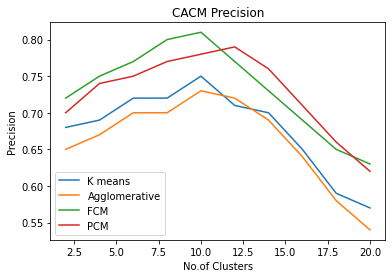

In [ ]:
cacm_prec.plot(xlabel = 'No.of Clusters', ylabel = 'Precision',title = 'CACM Precision')

In [ ]:
cacm_recall = get_metrics(df)['rec']
cacm_recall.head()

,K means,Agglomerative,FCM,PCM
2,0.75,0.76,0.78,0.79
4,0.78,0.77,0.79,0.80
6,0.77,0.75,0.81,0.80
8,0.75,0.75,0.78,0.79
10,0.73,0.72,0.77,0.78


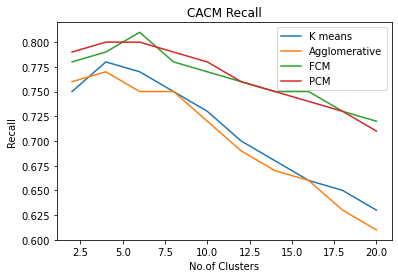

In [ ]:
cacm_recall.plot(xlabel = 'No.of Clusters', ylabel = 'Recall',title = 'CACM Recall')

In [ ]:
cacm_fm = 2*cacm_prec*cacm_recall/(cacm_prec + cacm_recall)
cacm_fm.head()

,K means,Agglomerative,FCM,PCM
2,0.713287,0.700709,0.748800,0.742282
4,0.732245,0.716528,0.769481,0.768831
6,0.744161,0.724138,0.789494,0.774194
8,0.734694,0.724138,0.789873,0.779872
10,0.739865,0.724966,0.789494,0.780000


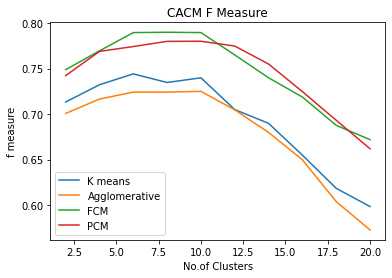

In [ ]:
cacm_fm.plot(xlabel = 'No.of Clusters', ylabel = 'f measure', title = 'CACM F Measure')

In [ ]:
cacm_map = get_metrics(df)['map']
cacm_map.head()

,K means,Agglomerative,FCM,PCM
2,0.60,0.58,0.64,0.64
4,0.61,0.60,0.66,0.67
6,0.63,0.61,0.69,0.70
8,0.64,0.62,0.73,0.72
10,0.66,0.64,0.74,0.72


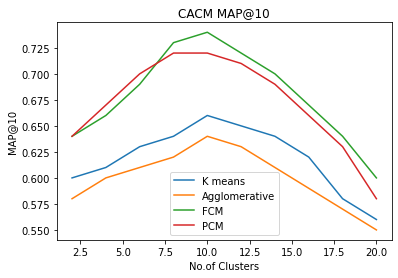

In [ ]:
cacm_map.plot(xlabel = 'No.of Clusters', ylabel = 'MAP@10', title = 'CACM MAP@10')

In [ ]:
import pandas as pd
trec_prec = get_metrics(trec_df)['prec']
trec_prec.head()

,K means,Agglomerative,FCM,PCM
2,0.69,0.67,0.74,0.73
4,0.72,0.69,0.76,0.74
6,0.74,0.70,0.79,0.76
8,0.75,0.72,0.80,0.78
10,0.73,0.70,0.78,0.76


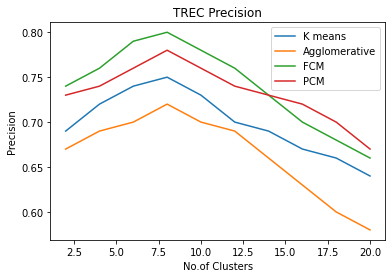

In [ ]:
trec_prec.plot(xlabel = 'No.of Clusters', ylabel = 'Precision',title = 'TREC Precision')

In [ ]:
trec_recall = get_metrics(trec_df)['rec']
trec_recall.head()

,K means,Agglomerative,FCM,PCM
2,0.72,0.71,0.74,0.74
4,0.75,0.73,0.77,0.76
6,0.75,0.71,0.79,0.77
8,0.74,0.71,0.77,0.76
10,0.71,0.69,0.76,0.74


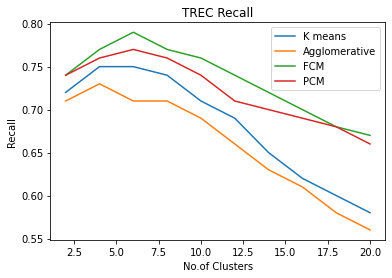

In [ ]:
trec_recall.plot(xlabel = 'No.of Clusters', ylabel = 'Recall',title = 'TREC Recall')

In [ ]:
trec_fm = 2*trec_prec*trec_recall/(trec_prec + trec_recall)
trec_fm.head()

,K means,Agglomerative,FCM,PCM
2,0.704681,0.689420,0.740000,0.734966
4,0.734694,0.709437,0.764967,0.749867
6,0.744966,0.704965,0.790000,0.764967
8,0.744966,0.714965,0.784713,0.769870
10,0.719861,0.694964,0.769870,0.749867


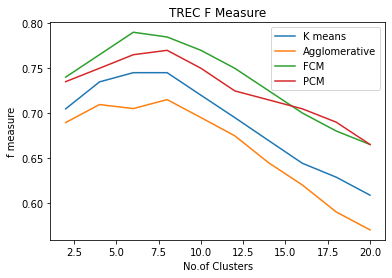

In [ ]:
trec_fm.plot(xlabel = 'No.of Clusters', ylabel = 'f measure', title = 'TREC F Measure')

In [ ]:
trec_map = get_metrics(trec_df)['map']
trec_map.head()

,K means,Agglomerative,FCM,PCM
2,0.67,0.63,0.73,0.72
4,0.70,0.65,0.74,0.74
6,0.70,0.68,0.77,0.76
8,0.72,0.70,0.75,0.74
10,0.70,0.68,0.72,0.73


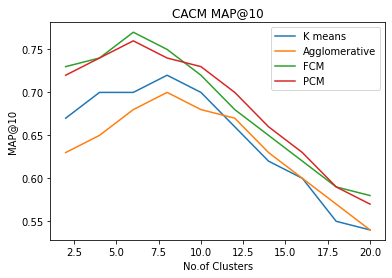

In [ ]:
trec_map.plot(xlabel = 'No.of Clusters', ylabel = 'MAP@10', title = 'TREC MAP@10')

In [ ]:
cacm_metrics_table = pd.DataFrame(data={'Precision' : [cacm_prec[col][6] for col in cacm_prec.columns],
                                   'Recall' : [cacm_recall[col][6] for col in cacm_prec.columns],
                                   'F measure' : [round(cacm_fm[col][6],2) for col in cacm_prec.columns],
                                   'MAP@10' : [cacm_map[col][6] for col in cacm_prec.columns]}, index = cacm_prec.columns)
cacm_metrics_table

,Precision,Recall,F measure,MAP@10
K means,0.72,0.77,0.74,0.63
Agglomerative,0.70,0.75,0.72,0.61
FCM,0.77,0.81,0.79,0.69
PCM,0.75,0.80,0.77,0.70


In [ ]:
trec_metrics_table = pd.DataFrame(data={'Precision' : [trec_prec[col][6] for col in trec_prec.columns],
                                   'Recall' : [trec_recall[col][6] for col in trec_prec.columns],
                                   'F measure' : [round(trec_fm[col][6],2) for col in trec_prec.columns],
                                   'MAP@10' : [trec_map[col][6] for col in trec_prec.columns]}, index = trec_prec.columns)
trec_metrics_table

,Precision,Recall,F measure,MAP@10
K means,0.74,0.75,0.74,0.70
Agglomerative,0.70,0.71,0.70,0.68
FCM,0.79,0.79,0.79,0.77
PCM,0.76,0.77,0.76,0.76
